**Project Title - FBI dataset crime Prediction**

**PROJECT SUMMARY**
This project aims to develop a predictive model to estimate the number of crime incidents on a monthly basis, using detailed data collected at the day and hour level. The dataset includes variables such as crime type, neighborhood information, and time stamps, enabling a comprehensive analysis of both spatial and temporal crime patterns. By identifying when and where crimes are most likely to occur, the model can assist law enforcement agencies in optimizing patrol schedules, allocating personnel more effectively, and deploying resources to areas with the highest need.

GITHUB LINK - https://github.com/ankitgaurav567/FBI-time-series

Collab link-https://colab.research.google.com/drive/1JHza-_nRUwWQi5rTvv-Kuk57ihKWztaQ?usp=sharing

In [5]:
import pandas as pd # For handling datasets
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt # For data visualization
import statsmodels.api as sm # For statistical modeling
from statsmodels.tsa.statespace.sarimax import SARIMAX # For time series forecasting
from sklearn.impute import SimpleImputer # For handling missing values
from google.colab import files #upload train and test dataset

In [6]:
uploaded = files.upload()

Saving Train.xlsx to Train.xlsx


In [7]:
train = pd.read_excel('Train.xlsx',engine='openpyxl')

In [8]:
train.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


In [10]:
train.isnull().sum()

,0
TYPE,0
HUNDRED_BLOCK,13
NEIGHBOURHOOD,51491
X,0
Y,0
Latitude,0
Longitude,0
HOUR,49365
MINUTE,49365
YEAR,0


In [11]:
#Drop all the rows with null values that is having 0 or empty cells

train.dropna(inplace=True)
train.isnull().sum()

,0
TYPE,0
HUNDRED_BLOCK,0
NEIGHBOURHOOD,0
X,0
Y,0
Latitude,0
Longitude,0
HOUR,0
MINUTE,0
YEAR,0


In [19]:

aggregated_data = train.groupby(['TYPE', 'MONTH', 'YEAR']).size().reset_index(name='Number of Incidents')
aggregated_data

,TYPE,MONTH,YEAR,Number of Incidents
0,Break and Enter Commercial,1,1999,303
1,Break and Enter Commercial,1,2000,216
2,Break and Enter Commercial,1,2001,193
3,Break and Enter Commercial,1,2002,277
4,Break and Enter Commercial,1,2003,290
...,...,...,...,...
1243,Vehicle Collision or Pedestrian Struck (with I...,12,2007,111
1244,Vehicle Collision or Pedestrian Struck (with I...,12,2008,134
1245,Vehicle Collision or Pedestrian Struck (with I...,12,2009,111
1246,Vehicle Collision or Pedestrian Struck (with I...,12,2010,157


In [22]:
#  In aggregate data data frame sort the year

aggregated_data = aggregated_data.sort_values(by='YEAR')
aggregated_data

,TYPE,MONTH,YEAR,Number of Incidents
390,Mischief,7,1999,553
1222,Vehicle Collision or Pedestrian Struck (with I...,11,1999,160
78,Break and Enter Commercial,7,1999,252
1118,Vehicle Collision or Pedestrian Struck (with I...,3,1999,127
325,Mischief,2,1999,483
...,...,...,...,...
90,Break and Enter Commercial,7,2011,215
38,Break and Enter Commercial,3,2011,192
51,Break and Enter Commercial,4,2011,179
1221,Vehicle Collision or Pedestrian Struck (with I...,10,2011,134


In [31]:
# Generate a graph with year and month sorted such that if year of two of the rows are same then month will be checked
aggregated_data = aggregated_data.sort_values(by=['YEAR','MONTH'])
aggregated_data

,TYPE,MONTH,YEAR,Number of Incidents
468,Other Theft,1,1999,247
312,Mischief,1,1999,546
624,Theft from Vehicle,1,1999,1416
936,Theft of Vehicle,1,1999,638
156,Break and Enter Residential/Other,1,1999,644
...,...,...,...,...
935,Theft of Bicycle,12,2011,121
467,Mischief,12,2011,340
623,Other Theft,12,2011,379
311,Break and Enter Residential/Other,12,2011,377


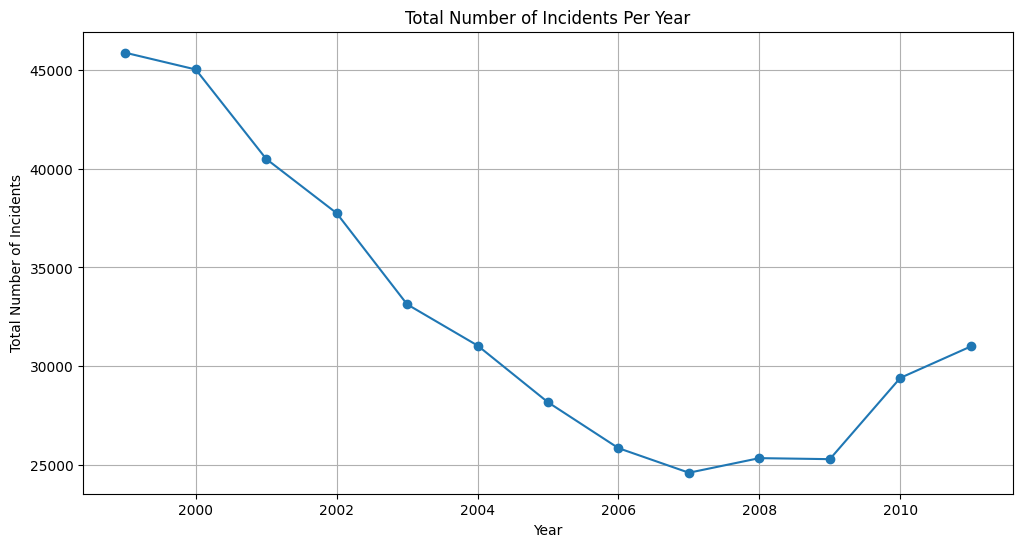

In [33]:
#  Generate a graph with total number of incidents per year

import matplotlib.pyplot as plt
# Group by year and count incidents
yearly_incidents = aggregated_data.groupby('YEAR')['Number of Incidents'].sum()

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(yearly_incidents.index, yearly_incidents.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Number of Incidents')
plt.title('Total Number of Incidents Per Year')
plt.grid(True)
plt.show()


The insight is that overall incidents are decreasing over time

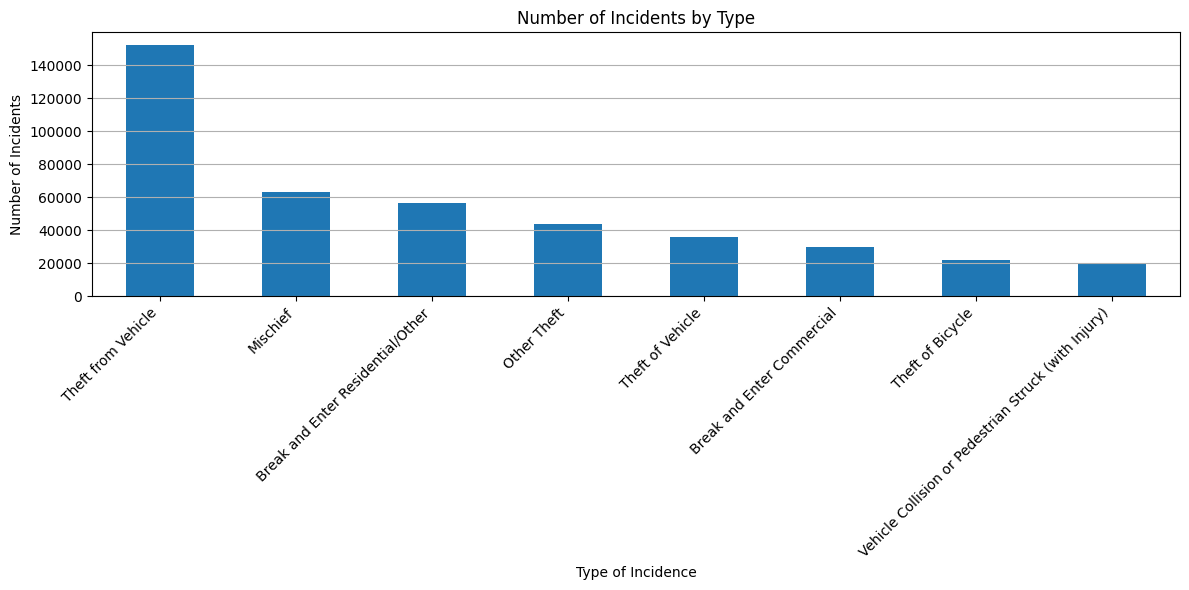

In [25]:
# aggregate data frame to generate a graph of type of incidence and their count


# Aggregate data by TYPE and count incidents
type_incidents = aggregated_data.groupby('TYPE')['Number of Incidents'].sum().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
type_incidents.plot(kind='bar')
plt.xlabel('Type of Incidence')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The insight is that thrift from vehicle is very common and it is quite high as compared to others hence the fbi should focus on vehicle theft more

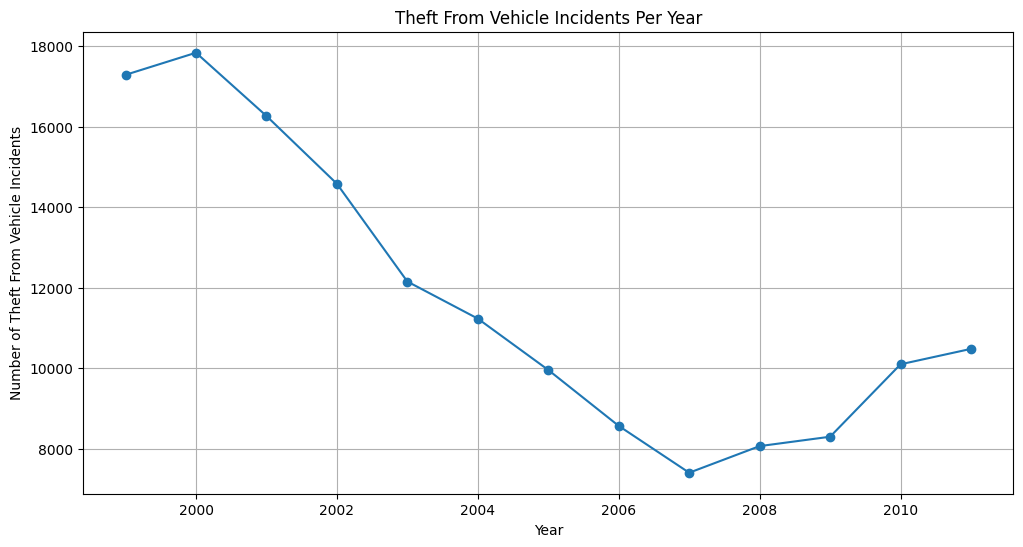

In [28]:
# a graph Theft From vehicle per year using

import matplotlib.pyplot as plt
# Filter for "Theft From Vehicle" incidents
theft_from_vehicle_data = aggregated_data[aggregated_data['TYPE'] == 'Theft from Vehicle']

# Group by year and sum the incidents
theft_from_vehicle_yearly = theft_from_vehicle_data.groupby('YEAR')['Number of Incidents'].sum()

# Plotting the graph
plt.figure(figsize=(12, 6))
theft_from_vehicle_yearly.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Theft From Vehicle Incidents')
plt.title('Theft From Vehicle Incidents Per Year')
plt.grid(True)
plt.show()


Here also similar insight the crime is decreasing overtime and as this is the crime with highest percentage in overall data hence we can expect decrease in crime overcoming next few years

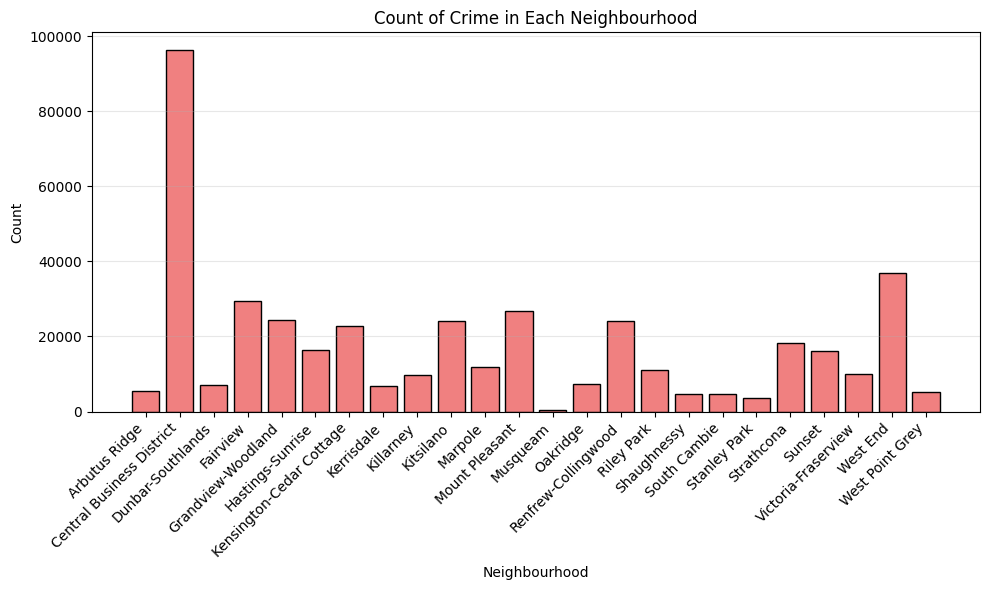

In [30]:
# train data frame to generate a graph of  total number of incidence and Neighbourhood


# Count number of crimes per neighbourhood
neighbourhood_counts = train['NEIGHBOURHOOD'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(neighbourhood_counts.index, neighbourhood_counts.values,
        color='lightcoral', edgecolor='black')
plt.title('Count of Crime in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


FBI should focus more on West End and central business as these have most number of cases as compared to others hence distribution of police force should be according to the number of crimes committed

In [35]:
def get_season(month):
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Fall'

aggregated_data['SEASON'] = aggregated_data['MONTH'].apply(get_season)
aggregated_data


,TYPE,MONTH,YEAR,Number of Incidents,SEASON
468,Other Theft,1,1999,247,Winter
312,Mischief,1,1999,546,Winter
624,Theft from Vehicle,1,1999,1416,Winter
936,Theft of Vehicle,1,1999,638,Winter
156,Break and Enter Residential/Other,1,1999,644,Winter
...,...,...,...,...,...
935,Theft of Bicycle,12,2011,121,Winter
467,Mischief,12,2011,340,Winter
623,Other Theft,12,2011,379,Winter
311,Break and Enter Residential/Other,12,2011,377,Winter


RMSE: 53.95


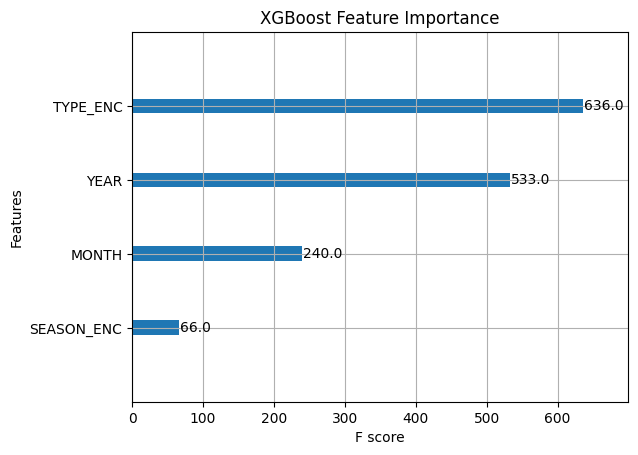

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


# Make a copy
df = aggregated_data.copy()

# Encode TYPE and SEASON
type_encoder = LabelEncoder()
df['TYPE_ENC'] = type_encoder.fit_transform(df['TYPE'])

season_encoder = LabelEncoder()
df['SEASON_ENC'] = season_encoder.fit_transform(df['SEASON'])

# Define features and target
X = df[['TYPE_ENC', 'MONTH', 'YEAR', 'SEASON_ENC']]
y = df['Number of Incidents']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Optional: Feature importance
xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()


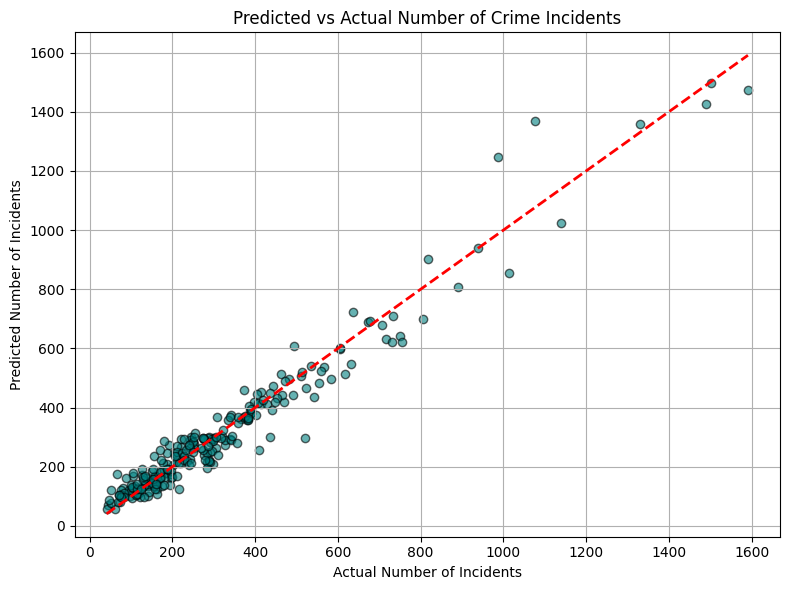

In [38]:


# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # diagonal line
plt.xlabel('Actual Number of Incidents')
plt.ylabel('Predicted Number of Incidents')
plt.title('Predicted vs Actual Number of Crime Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


This is predicted vs actual crime and as we can see most number of incidents are less than 600 they are near to the actual prediction and the more we go forward towards 1600 the prediction becomes less Reliable.

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor



# Make a copy
df = aggregated_data.copy()

# Encode TYPE and SEASON
type_encoder = LabelEncoder()
df['TYPE_ENC'] = type_encoder.fit_transform(df['TYPE'])

season_encoder = LabelEncoder()
df['SEASON_ENC'] = season_encoder.fit_transform(df['SEASON'])

# Define features and target
X = df[['TYPE_ENC', 'MONTH', 'YEAR', 'SEASON_ENC']]
y = df['Number of Incidents']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train random forest
model1 = RandomForestRegressor(n_estimators=100,  max_depth=4, random_state=42)
model1.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")




RMSE: 88.37


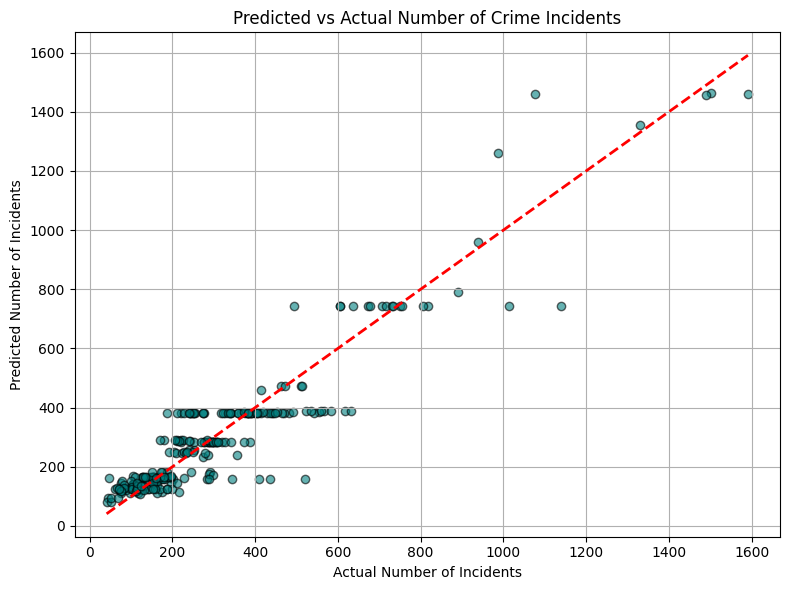

In [43]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # diagonal line
plt.xlabel('Actual Number of Incidents')
plt.ylabel('Predicted Number of Incidents')
plt.title('Predicted vs Actual Number of Crime Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

It is a scatter plot tells us that random forest is less reliable as compared to XG boost

In [48]:
uploaded1 = files.upload()

Saving Test (2).csv to Test (2) (1).csv


In [51]:
output = pd.read_csv('Test (2).csv')

In [52]:
output

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN
...,...,...,...,...
157,2012,1,Other Theft,NaN
158,2012,1,Offence Against a Person,NaN
159,2012,1,Mischief,NaN
160,2012,1,Break and Enter Residential/Other,NaN


In [65]:
def get_season(month):
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Fall'

output['SEASON'] = output['MONTH'].apply(get_season)
output

,YEAR,MONTH,TYPE,Incident_Counts,SEASON,TYPE_ENC,SEASON_ENC,Number of Incidents
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN,Summer,8,3,128
1,2013,6,Theft of Vehicle,NaN,Summer,7,3,128
2,2013,6,Theft of Bicycle,NaN,Summer,6,3,119
3,2013,6,Theft from Vehicle,NaN,Summer,5,3,180
4,2013,6,Other Theft,NaN,Summer,4,3,780
...,...,...,...,...,...,...,...,...
157,2012,1,Other Theft,NaN,Winter,4,3,765
158,2012,1,Offence Against a Person,NaN,Winter,3,3,363
159,2012,1,Mischief,NaN,Winter,2,3,341
160,2012,1,Break and Enter Residential/Other,NaN,Winter,1,3,280


In [66]:
# Encode TYPE and SEASON
type_encoder = LabelEncoder()
output['TYPE_ENC'] = type_encoder.fit_transform(output['TYPE'])

season_encoder = LabelEncoder()
output['SEASON_ENC'] = season_encoder.fit_transform(output['SEASON'])

In [67]:
output

,YEAR,MONTH,TYPE,Incident_Counts,SEASON,TYPE_ENC,SEASON_ENC,Number of Incidents
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN,Summer,8,2,128
1,2013,6,Theft of Vehicle,NaN,Summer,7,2,128
2,2013,6,Theft of Bicycle,NaN,Summer,6,2,119
3,2013,6,Theft from Vehicle,NaN,Summer,5,2,180
4,2013,6,Other Theft,NaN,Summer,4,2,780
...,...,...,...,...,...,...,...,...
157,2012,1,Other Theft,NaN,Winter,4,3,765
158,2012,1,Offence Against a Person,NaN,Winter,3,3,363
159,2012,1,Mischief,NaN,Winter,2,3,341
160,2012,1,Break and Enter Residential/Other,NaN,Winter,1,3,280


In [68]:
X_new = output[['TYPE_ENC', 'MONTH', 'YEAR', 'SEASON_ENC']]
output['Number of Incidents'] = model.predict(X_new).round(0).astype(int)

In [69]:
print(type(model))

<class 'xgboost.sklearn.XGBRegressor'>


In [70]:
output

,YEAR,MONTH,TYPE,Incident_Counts,SEASON,TYPE_ENC,SEASON_ENC,Number of Incidents
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN,Summer,8,2,135
1,2013,6,Theft of Vehicle,NaN,Summer,7,2,135
2,2013,6,Theft of Bicycle,NaN,Summer,6,2,123
3,2013,6,Theft from Vehicle,NaN,Summer,5,2,256
4,2013,6,Other Theft,NaN,Summer,4,2,803
...,...,...,...,...,...,...,...,...
157,2012,1,Other Theft,NaN,Winter,4,3,765
158,2012,1,Offence Against a Person,NaN,Winter,3,3,363
159,2012,1,Mischief,NaN,Winter,2,3,341
160,2012,1,Break and Enter Residential/Other,NaN,Winter,1,3,280


This is the final output in which Number of Incidents is pridicted using xg boost.

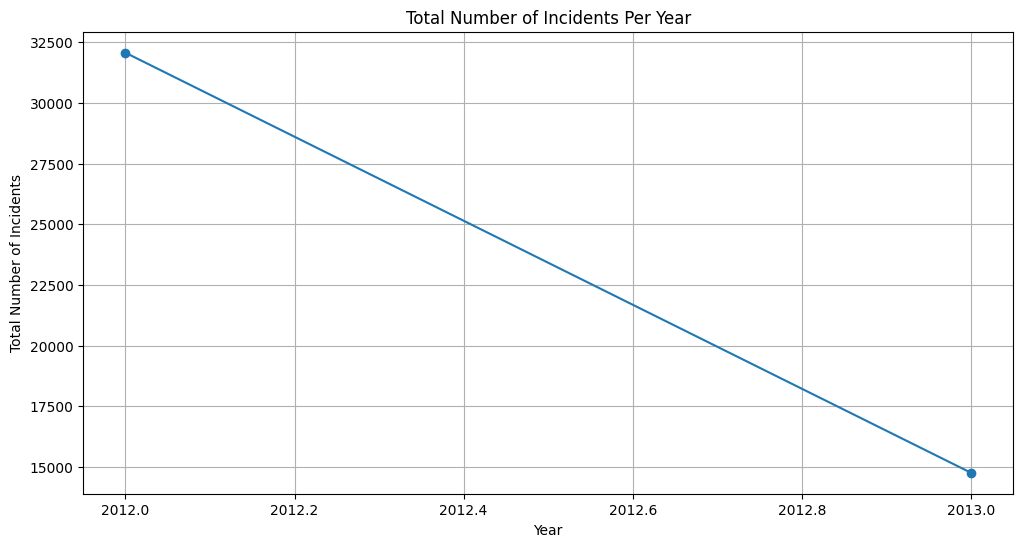

In [71]:
#  Generate a graph with total number of incidents per year

import matplotlib.pyplot as plt
# Group by year and count incidents
yearly_incidents1 = output.groupby('YEAR')['Number of Incidents'].sum()

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(yearly_incidents1.index, yearly_incidents1.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Number of Incidents')
plt.title('Total Number of Incidents Per Year')
plt.grid(True)
plt.show()

According to the model the number of incident would decrease overtime